<a href="https://colab.research.google.com/github/aqsa-isha/Encryptix-Iris-Flower-Classification/blob/main/Iris_Flower_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Iris Flower Classification

Iris flower classification is a real-world problem because it involves accurately categorizing different species of iris flowers based on their characteristics, which has practical applications in various fields such as botany, agriculture, and ecology.

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline

## Iris Dataset

In [2]:
# import the iris dataset
iris = pd.read_csv('/content/IRIS.csv')


In [3]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


## Data Structure

In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## Check the Columns

In [6]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [7]:
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
iris.columns = columns
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
iris.duplicated().value_counts()

,count
False,147
True,3


# Data Shape

In [9]:
print(iris.shape)
rows, cols = iris.shape
print("Number of rows", rows)
print("Number of columns", cols)

(150, 5)
Number of rows 150
Number of columns 5


In [10]:
iris.drop_duplicates(inplace=True)

In [11]:
iris.shape

(147, 5)

In [12]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
Index: 147 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  147 non-null    float64
 1   sepal_width   147 non-null    float64
 2   petal_length  147 non-null    float64
 3   petal_width   147 non-null    float64
 4   species       147 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.9+ KB


## Find missing values

In [13]:
iris.isnull()

,sepal_length,sepal_width,petal_length,petal_width,species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [14]:
iris.isnull().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
species,0


In [15]:
# percentage calculation of missing values
iris.isnull().sum() / iris.shape[0] * 100

,0
sepal_length,0.0
sepal_width,0.0
petal_length,0.0
petal_width,0.0
species,0.0


## Summary Statistics

In [16]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Exploratory Data Analysis

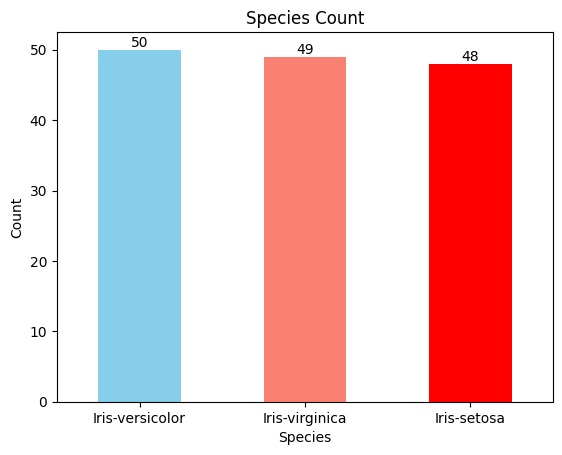

In [17]:
iris['species'].value_counts().plot(kind='bar', color=['skyblue', 'salmon', 'red'])
plt.title('Species Count')
plt.xlabel('Species')
plt.ylabel('Count')
plt.xticks(rotation=0)

# Data labels on the bars
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha = 'center', va = 'bottom')
plt.show()

## Correlation

In [18]:
dataset_numeric =iris.drop(columns=['species'])
corr_matrix = dataset_numeric.corr()
corr_matrix

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109321,0.871305,0.817058
sepal_width,-0.109321,1.000000,-0.421057,-0.356376
petal_length,0.871305,-0.421057,1.000000,0.961883
petal_width,0.817058,-0.356376,0.961883,1.000000


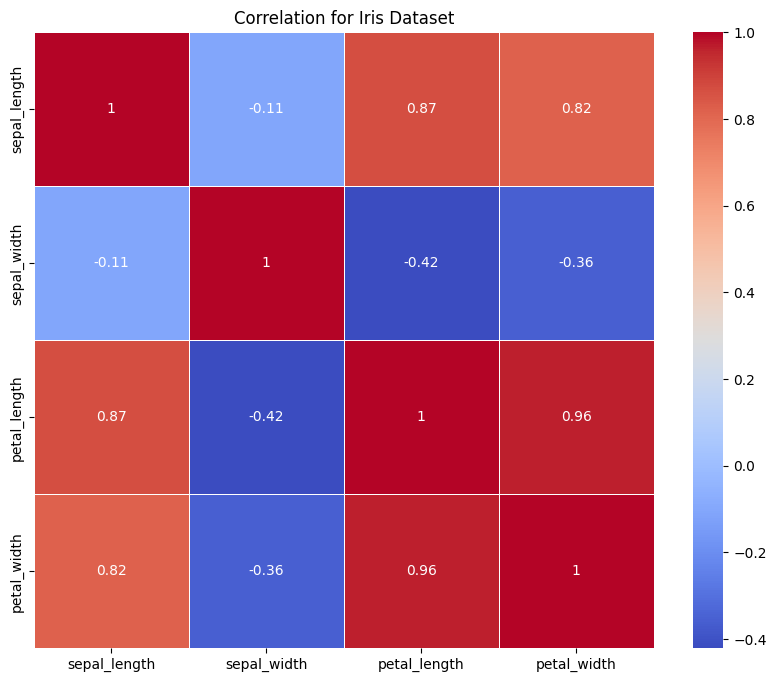

In [19]:
# Heat Map of Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation for Iris Dataset')
plt.show()

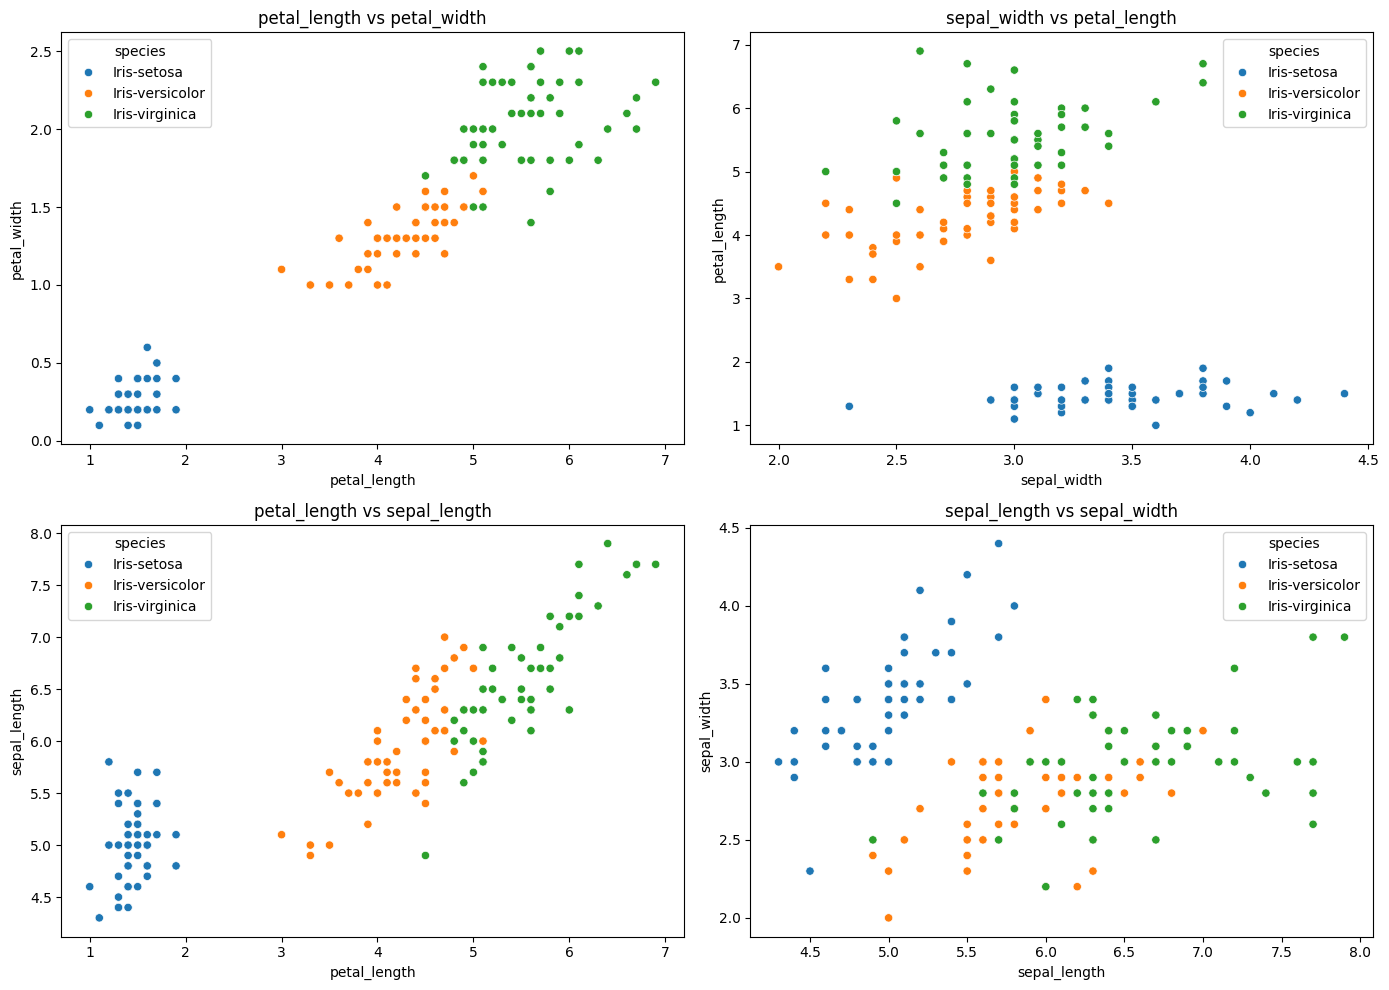

In [20]:
plt.figure(figsize=(14, 10))
# Highest positive correlation
plt.subplot(2, 2, 1)
sns.scatterplot(x = 'petal_length', y = 'petal_width', data = iris, hue = 'species')
plt.title('petal_length vs petal_width')

# Lowest negative correlation
plt.subplot(2, 2, 2)
sns.scatterplot(x = 'sepal_width', y = 'petal_length', data = iris, hue = 'species')
plt.title('sepal_width vs petal_length')

plt.subplot(2, 2, 3)
sns.scatterplot(x = 'petal_length', y = 'sepal_length', data = iris, hue = 'species')
plt.title('petal_length vs sepal_length')

plt.subplot(2, 2, 4)
sns.scatterplot(x = 'sepal_length', y = 'sepal_width', data = iris, hue = 'species')
plt.title('sepal_length vs sepal_width')

plt.tight_layout()
plt.show()

In [21]:
# 3D Scatter Plot
fig = px.scatter_3d(iris,
                    x='sepal_length',
                    y='petal_width',
                    z='petal_length',
                    color='species',
                    title='3D Scatter Plot of Iris Dataset',
                    size_max=5)  # Adjust marker size
fig.show()


### Libraires for Building a Model

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score, precision_score, recall_score


## Build the Model

## Defining X and Y

In [23]:
import pandas as pd

iris = pd.read_csv('/content/IRIS.csv')

# Drop the 'species' column
x = iris.drop(['species'], axis=1)



y = iris['species']

In [24]:
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [25]:
y

,species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


## Split the Dataset into Test and Train

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=21)

In [27]:
# Standardize the features
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

# Encode th target lables
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

### Model Evaluation


In [28]:
# Define the model list
la = LogisticRegression()
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
abc = AdaBoostClassifier()
knc = KNeighborsClassifier()
svc = SVC()
mnb = MultinomialNB()
mlp = MLPClassifier()
model_list = [la, dtc, rfc, abc, knc, svc, mnb, mlp]

In [29]:
# Define the models dictionary with model names and their instances
models = {
    "Logistic Regression": la,
    "Decision Tree": dtc,
    "Random Forest": rfc,
    "AdaBoost": abc,
    "K-Nearest Neighbors": knc,
    "Support Vector Machine": svc,
    "MultinomialNaive Bayes": mnb,
    "Multilayer Perceptron ": mlp
}

In [30]:
# Initialize variables
best_model = None
best_f1_score = 0.0
# Initialize result list
results = []

for model_name, model in models.items():
    try:
        # Fit the model on training data
        model.fit(x_train, y_train)
        # Predictions on training and test data
        y_pred_train = model.predict(x_train)
        y_pred_test = model.predict(x_test)

        # Calculate accuracy
        accuracy_train = accuracy_score(y_train, y_pred_train)
        accuracy_test = accuracy_score(y_test, y_pred_test)

        # Calculate precision
        precision_test = precision_score(y_test, y_pred_test, average='weighted')

        # Calculate recall
        recall_score_test = recall_score(y_test, y_pred_test, average='weighted')

        # Calculate F1 score
        f1_score_test = f1_score(y_test, y_pred_test, average='weighted')

        # Append results to the list
        results.append({
            "Model": model_name,
            "Accuracy (Train)": accuracy_train,
            "Accuracy (Test)": accuracy_test,
            "Precision (Test)": precision_test,
            "Recall (Test)": recall_score_test,
            "F1 Score (Test)": f1_score_test
        })

        print('*' * 50)
        print(f"Model: {model_name}")
        print('Training F1:', f1_score(y_train, y_pred_train, average='weighted'))
        print('Testing F1:', f1_score_test)

        # Update the best model if necessary
        if f1_score_test > best_f1_score:
            best_f1_score = f1_score_test
            best_model = model

    except Exception as e:
        print(f"Error with Model {model_name}: {str(e)}")

print('*' * 50)
print("Best Model:")
print(best_model)
print("Best Testing F1 Score:", best_f1_score)

# Create a DataFrame from the results
results_df = pd.DataFrame(results)
print(results_df)

**************************************************
Model: Logistic Regression
Training F1: 0.9750152788388082
Testing F1: 0.9344696969696968
**************************************************
Model: Decision Tree
Training F1: 1.0
Testing F1: 0.9344696969696968
**************************************************
Model: Random Forest
Training F1: 1.0
Testing F1: 0.9344696969696968


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning:

The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.



**************************************************
Model: AdaBoost
Training F1: 0.9750228763153882
Testing F1: 0.8302564102564103
**************************************************
Model: K-Nearest Neighbors
Training F1: 0.9668928457163751
Testing F1: 0.9011594202898551
**************************************************
Model: Support Vector Machine
Training F1: 0.9916717596129362
Testing F1: 0.9344696969696968
Error with Model MultinomialNaive Bayes: Negative values in data passed to MultinomialNB (input X)
**************************************************
Model: Multilayer Perceptron 
Training F1: 0.9749770114942529
Testing F1: 0.9344696969696968
**************************************************
Best Model:
LogisticRegression()
Best Testing F1 Score: 0.9344696969696968
                    Model  Accuracy (Train)  Accuracy (Test)  \
0     Logistic Regression          0.975000         0.933333   
1           Decision Tree          1.000000         0.933333   
2           Random Fores

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



In [31]:
# #  Regression using Randomized Search CVHypertuning Logistic
from sklearn.model_selection import RandomizedSearchCV, cross_val_score
grid={'C':np.arange(0,2,0.01)}

In [32]:
rs=RandomizedSearchCV(la,param_distributions=grid,cv=2)
rs.fit(x_train,y_train)

RandomizedSearchCV(cv=2, estimator=LogisticRegression(),
                   param_distributions={'C': array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53,...
       1.21, 1.22, 1.23, 1.24, 1.25, 1.26, 1.27, 1.28, 1.29, 1.3 , 1.31,
       1.32, 1.33, 1.34, 1.35, 1.36, 1.37, 1.38, 1.39, 1.4 , 1.41, 1.42,
       1.43, 1.44, 1.45, 1.46, 1.47, 1.48, 1.49, 1.5 , 1.51, 1.52, 1.53,
       1.54, 1.55, 1.56, 1.57, 1.58, 1.59, 1.6 , 1.61, 1.62, 1.63, 1.64,
       1.65, 1.66, 1.67, 1.68, 1.69, 1.7 , 1.71, 1.72, 1.73, 1.74, 1.75,
       1.76, 1.77, 1.78, 1.79, 1.8 , 1.81, 1.82, 1.83, 1.84, 1.85, 1.86,
       1.87, 1.88, 1.89, 1.9 , 1.91, 1.92, 1.93, 1.94, 1.95, 1.96, 1.97,
       1.98, 1.99])})

In [33]:
rs.best_params_

{'C': 1.98}

In [34]:
la1=rs.best_estimator_
la1

LogisticRegression(C=1.98)

## Training Data Evaluation

In [35]:
y_pred_train=la1.predict(x_train)

acc=accuracy_score(y_train,y_pred_train)
cnf=confusion_matrix(y_train,y_pred_train)
clf=classification_report(y_train,y_pred_train)

print('Accuracy Score:',acc)
print('Classification Report:\n',clf)
print('Confusion Matrix:\n',cnf)

Accuracy Score: 0.9833333333333333
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        39
Iris-versicolor       0.97      0.97      0.97        38
 Iris-virginica       0.98      0.98      0.98        43

       accuracy                           0.98       120
      macro avg       0.98      0.98      0.98       120
   weighted avg       0.98      0.98      0.98       120

Confusion Matrix:
 [[39  0  0]
 [ 0 37  1]
 [ 0  1 42]]


## Testing Data Evaluation

In [36]:
y_pred=la1.predict(x_test)

acc1=accuracy_score(y_test,y_pred)
cnf1=confusion_matrix(y_test,y_pred)
clf1=classification_report(y_test,y_pred)

print('Accuracy Score:',acc1)
print('Classification Report:\n',clf1)
print('Confusion Matrix:\n',cnf1)

Accuracy Score: 0.9333333333333333
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.83      0.91        12
 Iris-virginica       0.78      1.00      0.88         7

       accuracy                           0.93        30
      macro avg       0.93      0.94      0.93        30
   weighted avg       0.95      0.93      0.93        30

Confusion Matrix:
 [[11  0  0]
 [ 0 10  2]
 [ 0  0  7]]
